**Mario Cahyadi - 0706022210020**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [25]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/RanggaRijasa/DataMining2024/refs/heads/main/Bank.csv', delimiter=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2314,54,blue-collar,divorced,primary,no,-182,no,no,cellular,9,jul,98,1,-1,0,unknown,no
3647,36,management,single,secondary,no,0,no,no,cellular,13,aug,333,5,-1,0,unknown,no
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
2675,29,management,single,tertiary,no,437,no,no,cellular,5,aug,504,1,92,1,success,yes
328,35,unemployed,married,secondary,no,978,no,no,cellular,29,dec,1370,3,209,3,success,yes
4039,54,blue-collar,married,secondary,no,448,yes,yes,cellular,5,aug,98,1,-1,0,unknown,no
2473,32,technician,married,tertiary,no,-1053,yes,no,cellular,21,jul,357,3,-1,0,unknown,no
1321,40,services,married,secondary,no,17,no,no,cellular,4,jun,78,1,-1,0,unknown,no
938,37,technician,married,secondary,no,1633,yes,no,unknown,19,may,229,3,-1,0,unknown,no
2573,38,blue-collar,married,secondary,no,171,yes,yes,unknown,20,may,172,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [27]:
print("cek apakah ada yang null")
df.info()

cek apakah ada yang null
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [28]:
print("menunjukan statistik di kolom yang numerical")
df.describe()

menunjukan statistik di kolom yang numerical


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [29]:

print("hitung jumlah yes/no di kolom y")
print(df['y'].value_counts(dropna=False))


print("cek jumlah 'unknown' di semua kolom")
for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")


hitung jumlah yes/no di kolom y
y
no     4000
yes     521
Name: count, dtype: int64
cek jumlah 'unknown' di semua kolom
Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


In [30]:
print("merubah 'unknown' di kolom 'job' ")
df['job'] = df['job'].replace('admin.', 'management')
df.sample(10)

merubah 'unknown' di kolom 'job' 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2664,48,management,divorced,unknown,no,-70,no,no,cellular,14,may,243,1,-1,0,unknown,no
4476,42,management,married,tertiary,no,603,yes,no,cellular,5,nov,298,5,-1,0,unknown,no
195,57,retired,divorced,secondary,no,39,yes,no,cellular,30,jul,354,3,-1,0,unknown,no
3482,59,retired,married,secondary,no,5706,yes,no,cellular,25,jul,471,2,-1,0,unknown,no
1824,37,management,single,secondary,no,781,no,no,cellular,20,aug,75,1,-1,0,unknown,no
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no
1581,29,technician,single,tertiary,no,406,yes,no,cellular,17,jul,119,1,-1,0,unknown,no
2261,34,technician,single,secondary,no,0,no,no,cellular,21,aug,163,2,-1,0,unknown,no
3553,68,retired,married,secondary,no,19317,yes,no,cellular,4,aug,249,1,-1,0,unknown,yes
3578,53,technician,married,secondary,no,719,yes,no,unknown,14,may,230,1,-1,0,unknown,no


C:\Users\Rangga R\AppData\Local\Temp\ipykernel_7068\3494874800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, palette='viridis')


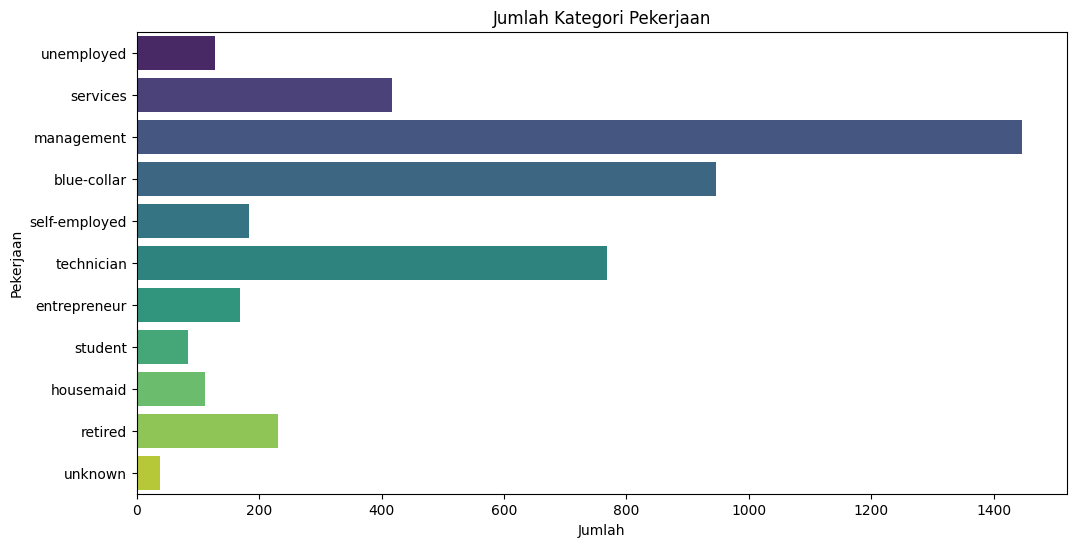

In [31]:
# 1. Plot Bar untuk Kategori Pekerjaan
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=df, palette='viridis')
plt.title('Jumlah Kategori Pekerjaan')
plt.xlabel('Jumlah')
plt.ylabel('Pekerjaan')
plt.show()

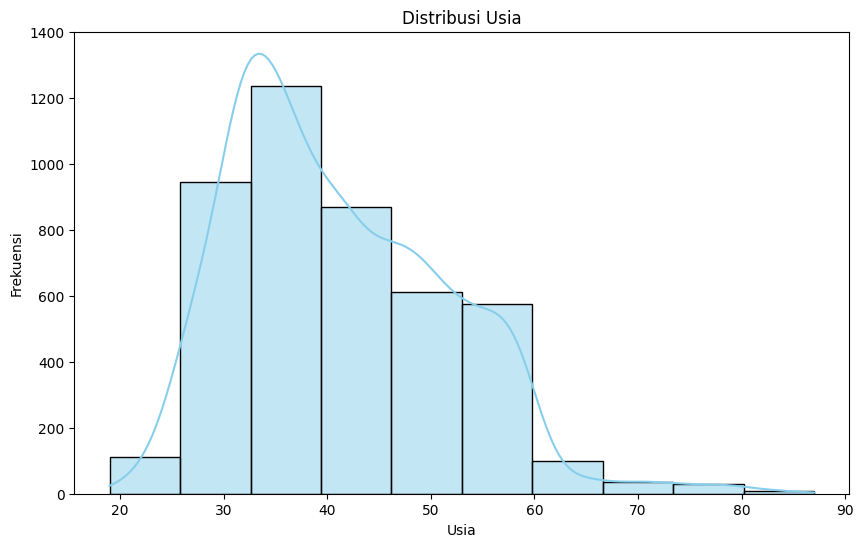

In [32]:
# 2. Distribusi Usia
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

In [33]:
label_encoder = LabelEncoder() ## menganti value menjadi int
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

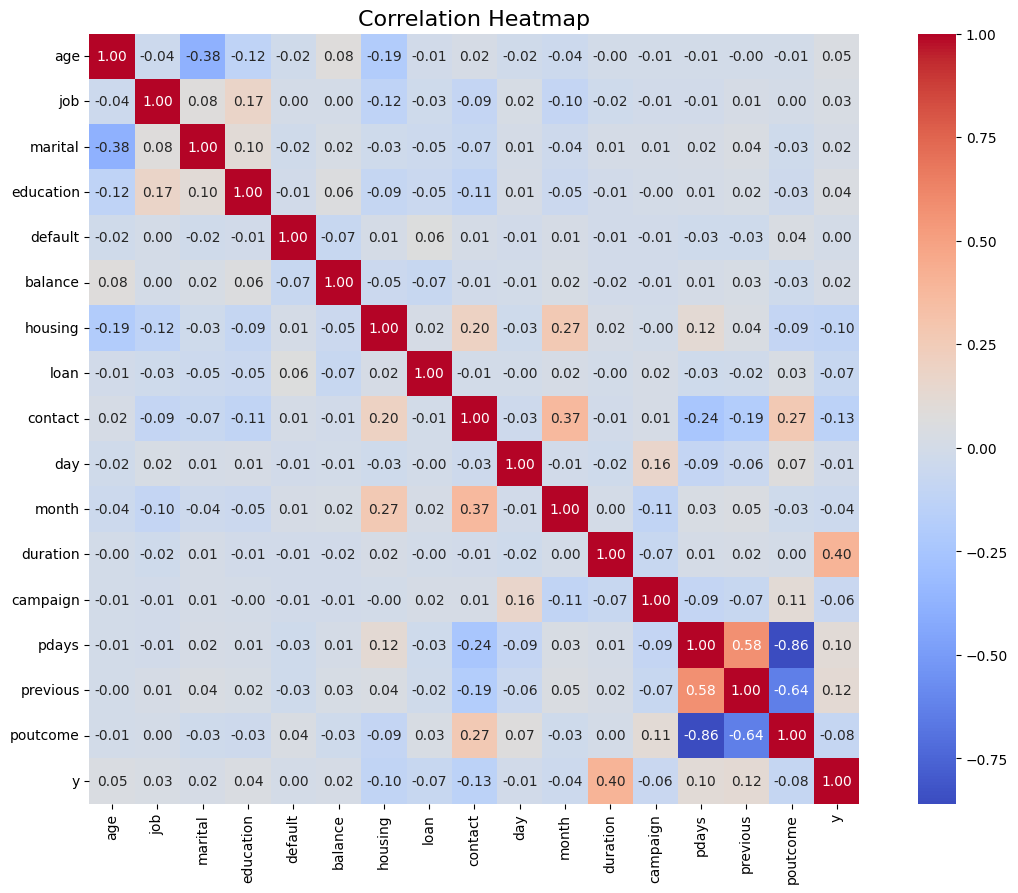

In [34]:
# 4. Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Machine Learning (Split Data)

In [35]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']

smote_enn = SMOTEENN(random_state=0) # menyamakan jumlah data dengan smoteen

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())



Class distribution after SMOTEEN:
y
0    3044
1    2275
Name: count, dtype: int64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [37]:
# A) Defining the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# B) Predict the test set results
y_pred_rf = rf_classifier.predict(X_test)

# C) Check accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

# D) Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)

# E) Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest: \n", class_report_rf)

# F) Results and conclusion
print("Random Forest berhasil mengklasifikasikan hampir semua instance dengan hanya 10 false positive dan 0 false negative, menunjukkan kinerja yang sangat baik pada kedua kelas.")
print("Random Forest memperoleh skor presisi, recall, dan F1 yang hampir sempurna di kedua kelas, dengan nilai mendekati 1,00.")


Accuracy: 0.9906015037593985

Confusion Matrix Random Forest:
[[611  10]
 [  0 443]]
Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       621
           1       0.98      1.00      0.99       443

    accuracy                           0.99      1064
   macro avg       0.99      0.99      0.99      1064
weighted avg       0.99      0.99      0.99      1064

Random Forest berhasil mengklasifikasikan hampir semua instance dengan hanya 10 false positive dan 0 false negative, menunjukkan kinerja yang sangat baik pada kedua kelas.
Random Forest memperoleh skor presisi, recall, dan F1 yang hampir sempurna di kedua kelas, dengan nilai mendekati 1,00.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [38]:
# A) Defining the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# B) Predict the test set results
y_pred = gb_model.predict(X_test)

# C) Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# D) Confusion matrix
cm_xg = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix XGBoost:")
print(cm_xg)

# E) Classification report
class_report_xg = classification_report(y_test, y_pred)
print("Classification Report Gradient Boosting: \n", class_report_xg)

# F) Results and conclusion
print("Gradient Boosting memiliki 16 false positive dan 7 false negative, yang sedikit menurunkan kinerjanya dibandingkan dengan Random Forest.")
print("Gradient Boosting menunjukkan presisi dan recall yang tinggi untuk kedua kelas, dengan rata-rata F1-score makro sebesar 0,98, sedikit lebih rendah daripada Random Forest.")


Accuracy: 0.9783834586466166

Confusion Matrix XGBoost:
[[605  16]
 [  7 436]]
Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       621
           1       0.96      0.98      0.97       443

    accuracy                           0.98      1064
   macro avg       0.98      0.98      0.98      1064
weighted avg       0.98      0.98      0.98      1064

Gradient Boosting memiliki 16 false positive dan 7 false negative, yang sedikit menurunkan kinerjanya dibandingkan dengan Random Forest.
Gradient Boosting menunjukkan presisi dan recall yang tinggi untuk kedua kelas, dengan rata-rata F1-score makro sebesar 0,98, sedikit lebih rendah daripada Random Forest.


In [39]:
# Konklusi Akhir

print("Model Random Forest mengungguli model Gradient Boosting dalam hal akurasi, presisi, recall, dan F1-score. Kedua model secara keseluruhan tetap menunjukkan kinerja yang baik.")


Model Random Forest mengungguli model Gradient Boosting dalam hal akurasi, presisi, recall, dan F1-score. Kedua model secara keseluruhan tetap menunjukkan kinerja yang baik.
